<h2> Extraction Information -- relation mining of International Alliances</h2>

<i>Xiaoxiao CHEN(Paris-saclay university)</i>

**IMPORTANT: Must provide the path to load the training data**
<br><br>

<h2> Introduction </h2>
Information extraction techniques are applied to a large amount of newswire textual documents, in order to acquire enough data to make significant statistics on them. These data can then be accessed by a query-based visualization tool.
Relations that we extract are opposition (NEG) or alliance (POS) relations between two countries, explicitly expressed in a same sentence, such as:
(1) Indonesia voiced support for East Timor’s bid to join the ASEAN. → POS(Indonesia, East Timor)
(2) London’s recent condemnations of Libyan leader Moamer Kadhafi’s bloody crackdown [...].
→ NEG(U.K., Libya)
(3) Chavez has stoop up for his longtime ally Kadhafi, [...]. → POS(Venezuela, Libya)
The alliance or opposition can be made explicit mainly by an action verb (protested), an event noun (condemnations) or a state noun (ally). Countries (relation arguments) can be designated by their actual names, the name of their capital or of a person representing this country.

In [4]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pandas as pd

### Loading the data

The training dataset are formed from the first phase of work. Here we can load the dataset directly by panda. Then the project is transformed to a standard meachine learning classification problem. The normal pipeline is used to train a model and test its performance with the test set.

In [5]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('train.csv',sep='\t',index_col=False)
y_df = data[['target']]
X_df = data.drop(['target', 'entity_pair','sentence'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.3, random_state=0)
data.head()

,distance_pair,len_sentence,pos_et1,pos_et2,num_ets_left,num_ets_inside,num_ets_right,presence_triggers_left,presence_triggers_inside,presence_triggers_right,...,num_verbs_inside,num_verbs_right,num_nouns_left,num_nouns_inside,num_nouns_right,num_pos_triggers,num_neg_triggers,target,entity_pair,sentence
0,1,9,1,3,0,0,1,0,0,1,...,1,0,0,0,3,0,1,NEU,"(Myanmar, NZ)",Myanmar tries NZ man on charge of insulting Bu...
1,2,9,1,4,0,1,1,0,0,1,...,1,0,0,1,2,0,1,M-NEG,"(Myanmar, man)",Myanmar tries NZ man on charge of insulting Bu...
2,3,9,1,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,M-NEG,"(ISIS, interests)",ISIS threats to American interests 'extremely ...
3,4,7,1,6,0,0,0,0,1,0,...,1,0,0,2,1,0,1,NEU,"(Guinean, U.N.)",Guinean opposition suspends protest for U.N.-l...
4,3,7,2,6,0,0,0,0,1,0,...,1,0,0,1,1,0,1,NEU,"(opposition, U.N.)",Guinean opposition suspends protest for U.N.-l...


In [21]:
len(X_test_a)

1547

In [9]:
data.columns

Index([u'distance_pair', u'len_sentence', u'pos_et1', u'pos_et2',
       u'num_ets_left', u'num_ets_inside', u'num_ets_right',
       u'presence_triggers_left', u'presence_triggers_inside',
       u'presence_triggers_right', u'num_triggers_left',
       u'num_triggers_inside', u'num_triggers_right',
       u'num_triggers_verbs_left', u'num_triggers_verbs_inside',
       u'num_triggers_verbs_right', u'num_triggers_nouns_left',
       u'num_triggers_nouns_insight', u'num_triggers_nouns_right',
       u'num_pos_triggers_left', u'num_pos_triggers_inside',
       u'num_pos_triggers_right', u'num_neg_triggers_left',
       u'num_neg_triggers_inside', u'num_neg_triggers_right', u'num_neg_left',
       u'num_neg_inside', u'num_neg_right', u'num_preps_left',
       u'num_preps_inside', u'num_preps_right', u'is_head_e1', u'is_head_e2',
       u'size_chunk_e1', u'size_chunk_e2', u'num_verbs_left',
       u'num_verbs_inside', u'num_verbs_right', u'num_nouns_left',
       u'num_nouns_inside', u'num

In [10]:
X_train_b = X_train[['num_pos_triggers','num_neg_triggers','num_pos_triggers_left','num_pos_triggers_inside',
                     'num_pos_triggers_right','num_neg_triggers_left','num_neg_triggers_inside',
                     'num_neg_triggers_right','num_neg_left','num_neg_inside', 'num_neg_right']]
X_train_a = X_train.drop(['num_pos_triggers','num_neg_triggers','num_pos_triggers_left','num_pos_triggers_inside',
                    'num_pos_triggers_right','num_neg_triggers_left','num_neg_triggers_inside',
                    'num_neg_triggers_right'],axis=1)
X_test_b = X_test[['num_pos_triggers','num_neg_triggers','num_pos_triggers_left','num_pos_triggers_inside','num_pos_triggers_right',
              'num_neg_triggers_left','num_neg_triggers_inside','num_neg_triggers_right','num_neg_left',
       'num_neg_inside', 'num_neg_right']]
X_test_a = X_test.drop(['num_pos_triggers','num_neg_triggers','num_pos_triggers_left','num_pos_triggers_inside',
                    'num_pos_triggers_right','num_neg_triggers_left','num_neg_triggers_inside',
                    'num_neg_triggers_right'],axis=1)

In [11]:
X_train_a.columns

Index([u'distance_pair', u'len_sentence', u'pos_et1', u'pos_et2',
       u'num_ets_left', u'num_ets_inside', u'num_ets_right',
       u'presence_triggers_left', u'presence_triggers_inside',
       u'presence_triggers_right', u'num_triggers_left',
       u'num_triggers_inside', u'num_triggers_right',
       u'num_triggers_verbs_left', u'num_triggers_verbs_inside',
       u'num_triggers_verbs_right', u'num_triggers_nouns_left',
       u'num_triggers_nouns_insight', u'num_triggers_nouns_right',
       u'num_neg_left', u'num_neg_inside', u'num_neg_right', u'num_preps_left',
       u'num_preps_inside', u'num_preps_right', u'is_head_e1', u'is_head_e2',
       u'size_chunk_e1', u'size_chunk_e2', u'num_verbs_left',
       u'num_verbs_inside', u'num_verbs_right', u'num_nouns_left',
       u'num_nouns_inside', u'num_nouns_right'],
      dtype='object')

### Encoding the target

In [16]:
options_target_NIL = {'NEU' : 0,
            'M-NEG' : 1,
            'M-POS' : 1,
            'V-NEG' : 1,
            'V-POS' : 1,
}

options_target_dir = {
    'NEU': 0,
    'M-POS': 1,
    'V-POS': 1,
    'M-NEG': 2,
    'V-NEG': 2,
}

options_target_rel = {    
    'M-NEG': 2,
    'V-NEG': 2,
    'M-POS': 1,
    'V-POS': 1,
}

In [17]:
def encodeTarget(dataframe):
    df = dataframe.copy()
    index = np.arange(len(df))
    df = df.set_index(index)
    for i in index:
        df.set_value(i, 'target', options_target_NIL[''.join(df.values[i].astype(str))])
    return df

def encodeTargetO(dataframe):
    df = dataframe.copy()
    index = np.arange(len(df))
    df = df.set_index(index)
    for i in index:
        df.set_value(i, 'target', options_target_rel[''.join(df.values[i].astype(str))])
    return df

def encodeTargetD(dataframe):
    df = dataframe.copy()
    index = np.arange(len(df))
    df = df.set_index(index)
    for i in index:
        df.set_value(i, 'target', options_target_dir[''.join(df.values[i].astype(str))])
    return df

y_train_a = encodeTarget(y_train)
y_test_a = encodeTarget(y_test)
y_test_f = encodeTargetD(y_test)
y_test_f.head()
y_df_dir = encodeTargetD(y_df)
y_df_dir.head()

,target
0,0
1,2
2,2
3,0
4,0


In [18]:
y_train_b = y_train[y_train['target'] != 'NEU']
X_train_b = X_train_b.copy().ix[y_train_b.index]
y_train_b = encodeTargetO(y_train_b)
y_test_b = y_test[y_test['target'] != 'NEU']
X_test_b = X_test_b.copy().ix[y_test_b.index]
y_test_b = encodeTargetO(y_test_b)
y_test_b.head()

,target
0,2
1,2
2,2
3,2
4,2


In [139]:
X_train_b.head()

,num_pos_triggers,num_neg_triggers,num_pos_triggers_left,num_pos_triggers_inside,num_pos_triggers_right,num_neg_triggers_left,num_neg_triggers_inside,num_neg_triggers_right,num_neg_left,num_neg_inside,num_neg_right
4463,0,2,0,0,0,0,2,0,0,0,0
3996,0,1,0,0,0,0,0,1,0,0,0
3948,1,1,0,1,0,0,0,1,0,0,0
2072,1,0,0,1,0,0,0,0,0,0,0
3235,0,2,0,0,0,0,2,0,0,0,0


### Some plots

Number of examples: 5154
NEU      2828
M-NEG     772
V-NEG     696
M-POS     538
V-POS     320
Name: target, dtype: int64


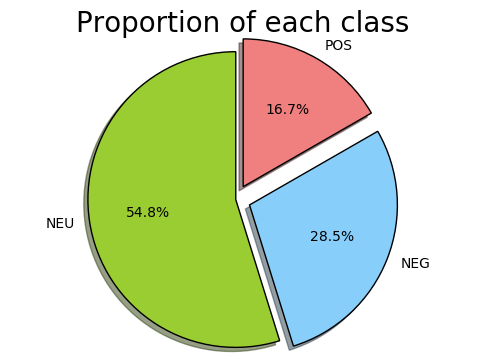

In [205]:
print('Number of examples: %s' % len(y_df))
print y_df['target'].value_counts()
#plot(y='target',kind='pie', autopct='%.2f', figsize=(5, 5));
labels = 'NEU', 'NEG', 'POS'
sizes = [54.8, 28.5,16.7]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0.1) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Proportion of each class',fontsize=20)
plt.show()

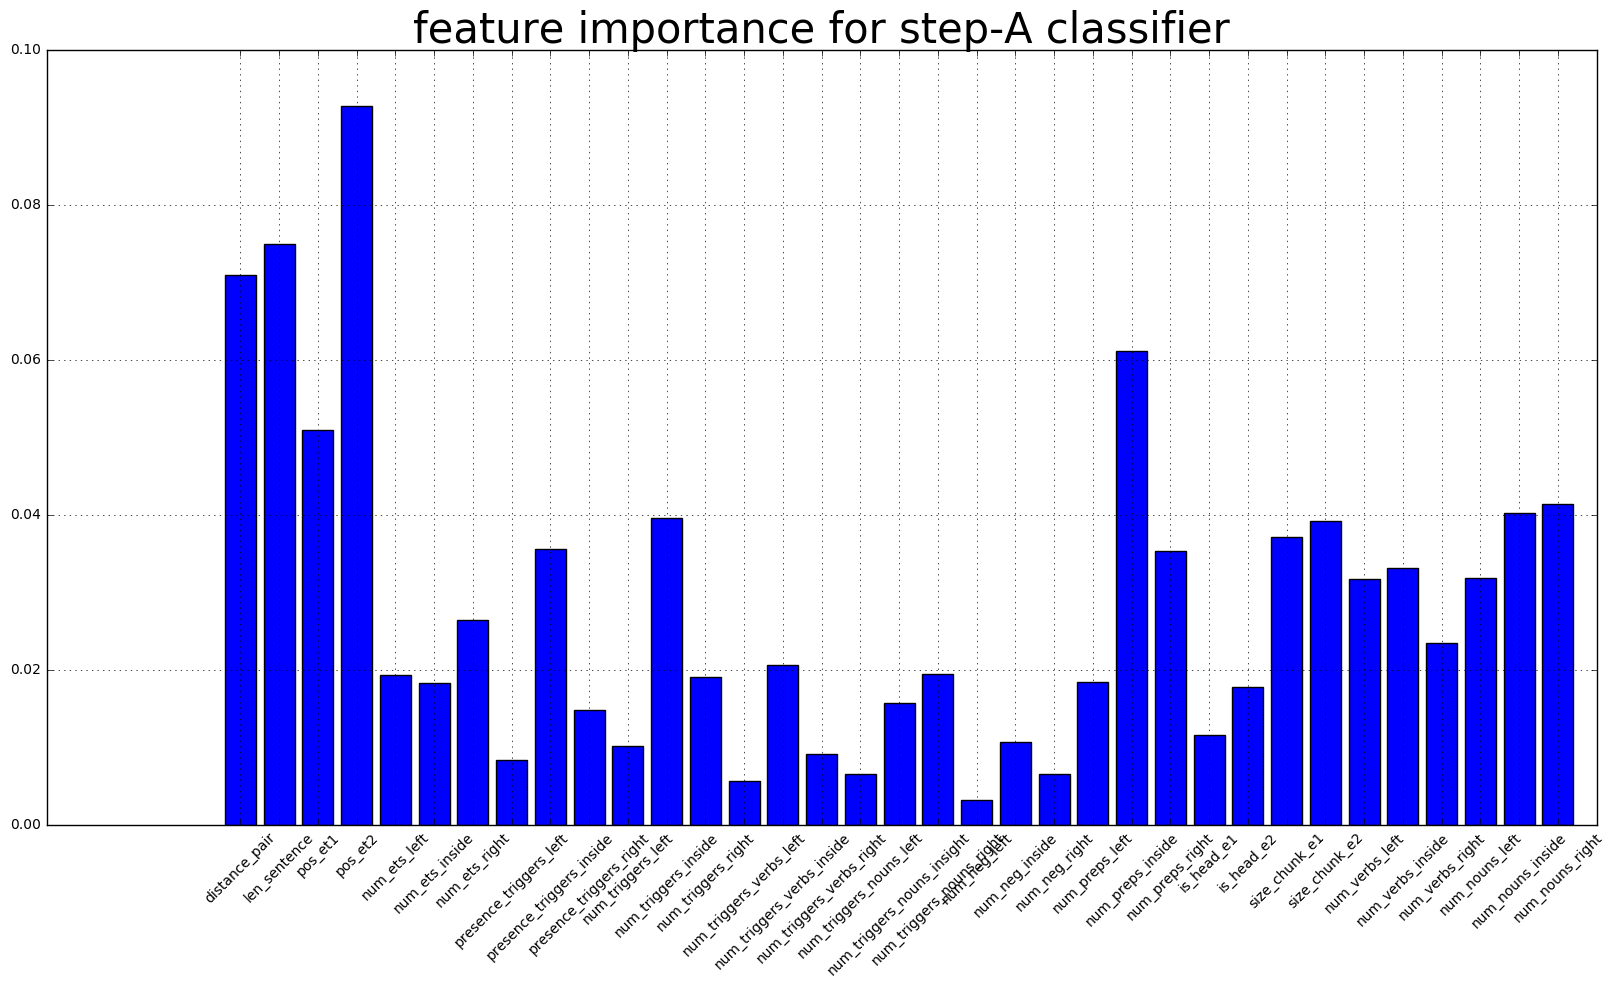

In [181]:
feature_im_a = [0.07086333,0.07494082,0.0508735,0.0926758,0.01929768,0.01831929,0.02642779,0.00838101,
                0.03560006,0.01483382,0.01012184,0.03950865,0.01903118,0.00559712,0.02056866,0.00909539,
                0.00651549,0.01569963,0.01940645,0.00315063,0.01071682,0.00648303,0.01844838,0.06115666,
                0.03532343,0.01155389,0.01770182,0.03709644,0.03913279,0.03164541,0.03306565,0.02337823,
                0.03187802,0.04016595,0.04134533]
feature_a = ['distance_pair', 'len_sentence', 'pos_et1', 'pos_et2',
       'num_ets_left', 'num_ets_inside', 'num_ets_right',
       'presence_triggers_left', 'presence_triggers_inside',
       'presence_triggers_right', 'num_triggers_left',
       'num_triggers_inside', 'num_triggers_right',
       'num_triggers_verbs_left', 'num_triggers_verbs_inside',
       'num_triggers_verbs_right', 'num_triggers_nouns_left',
       'num_triggers_nouns_insight', 'num_triggers_nouns_right',
       'num_neg_left', 'num_neg_inside', 'num_neg_right', 'num_preps_left',
       'num_preps_inside', 'num_preps_right', 'is_head_e1', 'is_head_e2',
       'size_chunk_e1', 'size_chunk_e2', 'num_verbs_left',
       'num_verbs_inside', 'num_verbs_right', 'num_nouns_left',
       'num_nouns_inside', 'num_nouns_right']
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(feature_im_a)), feature_im_a,align="center",alpha=1)
plt.title('feature importance for step-A classifier',fontsize=30)
plt.xticks(range(len(feature_im_a)), feature_a,rotation=45,fontsize=10)
plt.grid()
plt.show()

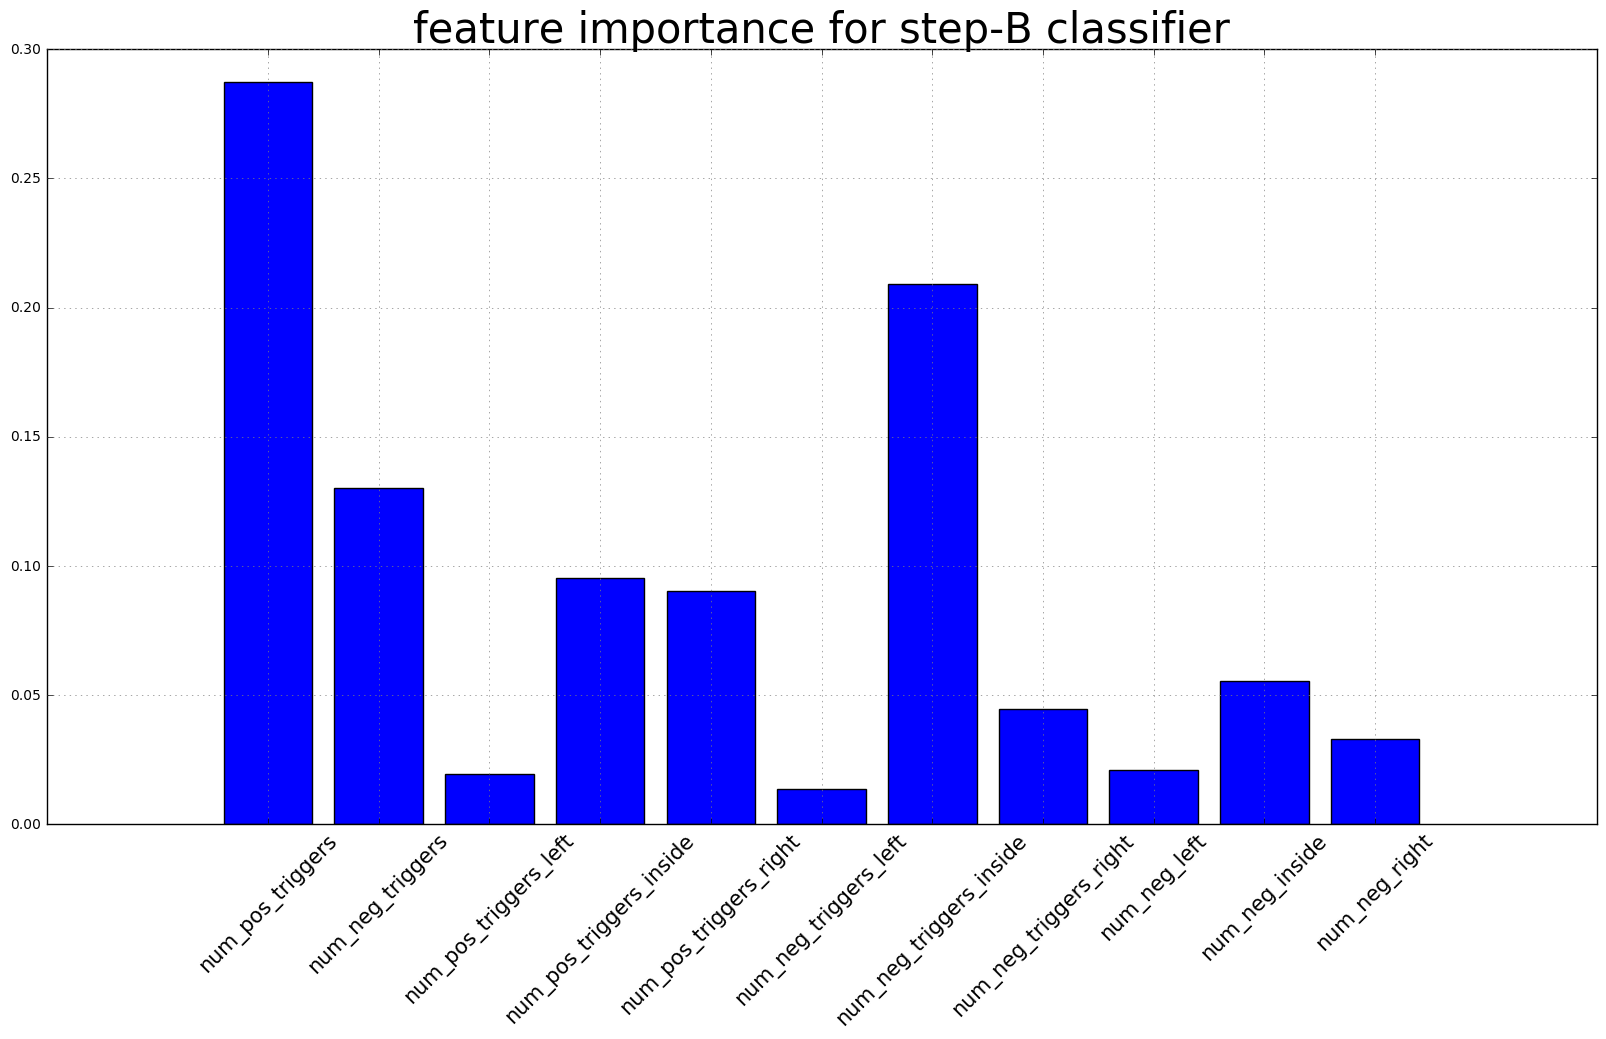

In [182]:
feature_im_b=[0.28751545,0.1301536,0.01955708,0.09528506,0.09014947,0.013838,0.2092559,0.04462721,0.0210502,0.05542442,0.03314362]

    
feature_b=['num_pos_triggers','num_neg_triggers','num_pos_triggers_left','num_pos_triggers_inside','num_pos_triggers_right',
           'num_neg_triggers_left','num_neg_triggers_inside','num_neg_triggers_right','num_neg_left','num_neg_inside',
       'num_neg_right']
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(feature_im_b)), feature_im_b,align="center",alpha=1)
plt.title('feature importance for step-B classifier',fontsize=30)
plt.xticks(range(len(feature_im_b)), feature_b,rotation=45,fontsize=15)
plt.grid(color='grey')
plt.show()

All the test score are recorded and formed a bar chart to illustrate the performances of each model.

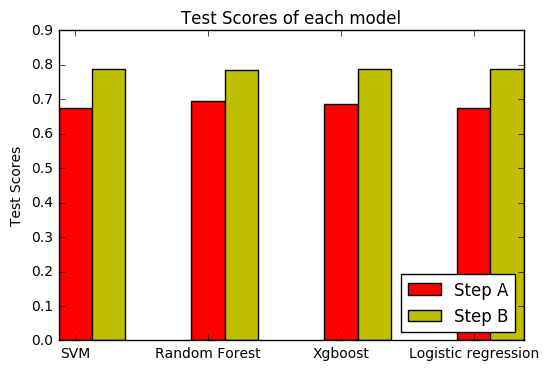

In [160]:
import numpy as np
N = 4
a_error = [0.6742,0.6942,0.6871,0.6752]

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, a_error, width, color='r')

b_error = [0.7867,0.7853,0.7881,0.7876]
rects2 = ax.bar(ind + width, b_error, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Test Scores')
ax.set_ylim(0,0.9)
ax.set_title('Test Scores of each model')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('SVM', 'Random Forest', 'Xgboost', 'Logistic regression'))

ax.legend((rects1[0], rects2[0]), ('Step A', 'Step B'),loc=4)

plt.show()

### Feature extractor for classification

The feature extractor for classification is implemented by the function <code>transform</code> . It receives the pandas dataframe <code>X_df</code> defined at the beginning of the notebook. It should produce a numpy array representing the features extracted, which would be used for the classification.  

In [140]:
import numpy as np
import pandas as pd

class FeatureExtractorClf(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_df):
        pass
    
    def transform(self, X_df):
        XX = X_df.values
        return XX

### Classification: predicting the relation type

The classifier follows a classical scikit-learn classifier template. It should be saved in the file <code>classifier.py</code>. In its simplest form it takes a scikit-learn pipeline and assignes it to <code>self.clf</code> in <code>__init__</code>.

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop, adam
from keras.utils import np_utils
from keras.objectives import  categorical_crossentropy
from keras.callbacks import Callback, EarlyStopping
from keras import backend as K
from keras.utils import np_utils
from keras.optimizers import SGD
import tensorflow as tf
from keras.regularizers import l2, activity_l2

class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = Pipeline([ 
            ('scl', StandardScaler()),
            ('clf', SVC(C=1000,kernel='rbf',gamma=2e-4))
        ])

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)
    
class Classifier2(BaseEstimator):
    def __init__(self):
        self.clf = RandomForestClassifier(n_estimators=1500,criterion='entropy',
                                          max_features='log2',max_depth = 10)

    def fit(self, X, y):
        self.clf.fit(X, y)
        print self.clf.feature_importances_

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)
    
class Classifier3(BaseEstimator):
    def __init__(self):
        self.clf = Pipeline([
            ('clf', xgb.XGBClassifier(max_depth=3,n_estimators=500,gamma=0.001,objective='binary:logistic'))
        ])

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X) 
    
class Classifier4(BaseEstimator):
    def __init__(self):
        self.clf = Pipeline([
            ('clf', LogisticRegression(penalty='l2',solver='sag',C=11))
        ])

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

class Classifier5(BaseEstimator):
    def __init__(self):
        tf.python.control_flow_ops = tf
        self.model = Sequential()
        self.model.add(Dense(400,init='normal',input_dim=35,activation='relu'))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(1, activation='sigmoid'))
    
        self.sgd = SGD(lr=0.005,momentum=0.9, nesterov=True)
        
        self.model.compile(loss='binary_crossentropy',
              optimizer=self.sgd, #'adam'
              metrics=['accuracy'])
        
    
    def fit(self, X, y):
        batch_size = 50
        nb_epoch = 10
        self.model.fit(X, y,batch_size=batch_size, nb_epoch=nb_epoch,verbose=1)
        
    def predict(self, X):
        return self.model.predict_classes(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

### Cross-validation to test the classifier -- separate for two steps

In [142]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def train_test_model_clf_a(X_df, y_df, skf_is, FeatureExtractor, Classifier):
    train_is, test_is = skf_is
    X_train_df = X_df.iloc[train_is].copy().values  
    y_train_df = y_df.iloc[train_is].copy().values.astype(int)
    X_test_df = X_df.iloc[test_is].copy().values                                   
    y_test_df = y_df.iloc[test_is].copy().values.astype(int)
    # Feature extraction
    fe_clf = FeatureExtractor()
    fe_clf.fit(X_train_df, y_train_df)
    # Train_step_a
    clf = Classifier()
    clf.fit(X_train_df, y_train_df)
    # Test
    y_pred_clf = clf.predict(X_test_df)                
    error = 1 - accuracy_score(y_test_df, y_pred_clf)
    print('-----------------------Step A----------------------------------')
    print('error = %s' % error)                                                                            
    print('classification report:\n %s' % classification_report(y_test_df, y_pred_clf))
    print('confusion matrix:\n %s' % confusion_matrix(y_test_df, y_pred_clf))
    return clf

def train_test_model_clf_b(X_df, y_df, skf_is, FeatureExtractor, Classifier):
    train_is, test_is = skf_is
    X_train_df = X_df.iloc[train_is].copy().values
    y_train_df = y_df.iloc[train_is].copy().values.astype(int)
    X_test_df = X_df.iloc[test_is].copy().values                                   
    y_test_df = y_df.iloc[test_is].copy().values.astype(int)
    # Feature extraction
    fe_clf = FeatureExtractor()
    fe_clf.fit(X_train_df, y_train_df)
    # Train_step_a
    clf = Classifier()
    clf.fit(X_train_df, y_train_df)
    # Test 
    y_pred_clf = clf.predict(X_test_df)                   
    error = 1 - accuracy_score(y_test_df, y_pred_clf)
    print('-----------------------Step B----------------------------------')
    print('error = %s' % error)                                                                            
    print('classification report:\n %s' % classification_report(y_test_df, y_pred_clf))
    print('confusion matrix:\n %s' % confusion_matrix(y_test_df, y_pred_clf))
    return clf
    
skf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)  
for i in xrange(5):
    #step a
    skf_is = list(skf.split(X_train_a))[i]
    classifier1 = train_test_model_clf_a(X_train_a, y_train_a, skf_is, FeatureExtractorClf, Classifier2)
    y_pred1 = classifier1.predict(X_test_a)
    print "test score: ",accuracy_score(y_test_a.values.astype(int), y_pred1)
    
    skf_is_b = list(skf.split(X_train_b))[i]
    classifier2 = train_test_model_clf_b(X_train_b, y_train_b, skf_is_b, FeatureExtractorClf, Classifier2)
    y_pred2 = classifier2.predict(X_test_b)
    print "tets score: ",accuracy_score(y_test_b.values.astype(int), y_pred2)
    
    print('-----------------------Final:A + B(test)----------------------------------')
    y_f_b = y_test.ix[y_pred1 == 1]
    index_2 = y_f_b.index
    X_f_b = X_test[['num_pos_triggers','num_neg_triggers','num_pos_triggers_left','num_pos_triggers_inside','num_pos_triggers_right',
              'num_neg_triggers_left','num_neg_triggers_inside','num_neg_triggers_right','num_neg_left',
       u'num_neg_inside', u'num_neg_right']].ix[index_2]
    y_pred2 = classifier2.predict(X_f_b)
    y_pred = y_test.copy()
    y_pred.ix[index_2] = y_pred2.reshape(-1,1)
    y_pred[y_pred['target']=='NEU']=0
    y_pred[y_pred['target']=='M-NEG']=0
    y_pred[y_pred['target']=='V-NEG']=0
    y_pred[y_pred['target']=='V-POS']=0
    y_pred[y_pred['target']=='M-POS']=0
    print('classification report:\n %s' % classification_report(y_test_f.values.astype(int), y_pred.values.astype(int)))
    print('confusion matrix:\n %s' % confusion_matrix(y_test_f.values.astype(int), y_pred.values.astype(int)))
    #X_temp = y_pred1[y_pred==1]
    
    '''
    print y_pred.size
    #step b
    y_df_b = data[['target']].ix[y_pred == 1]
    y_df_b = y_df_b[y_df_b['target'] != 'NEU']
    index_p = y_df_b.index
    X_df_b = X_df_b_o.copy().ix[y_df_b.index]
    index = np.arange(len(y_df_b))
    y_df_b = y_df_b.set_index(index)
    X_df_b = X_df_b.set_index(index)
    y_df_b = encodeTargetO(y_df_b)
    skf_is_b = list(skf.split(y_df_b))[i]
    y_pred_b = train_test_model_clf_b(X_df_b, y_df_b, skf_is_b, FeatureExtractorClf, Classifier3)
    # calculate the final precision
    #print index_p
    #print y_pred_b.size
    #print y_pred_b
    #non_nil = y_df_dir[y_df_dir['target']!=0].copy()
    non_nil = y_df_dir.ix[index_p].copy()
    non_nil_p = non_nil.copy()
    non_nil_p.set_value(non_nil_p.index,'target',0)
    non_nil_p.ix[index_p]= y_pred_b.reshape(-1,1)
    error_f = 1 - accuracy_score(non_nil.values.astype(int), non_nil_p.values.astype(int))
    print('-----------------------Final:A + B----------------------------------')
    print('error = %s' % error_f)                                                                            
    print('classification report:\n %s' % classification_report(non_nil.values.astype(int), non_nil_p.values.astype(int)))
    print('confusion matrix:\n %s' % confusion_matrix(non_nil.values.astype(int), non_nil_p.values.astype(int)))
    print('--------------------------------------------------------------------')
    print('--------------------------------------------------------------------')
    '''

/Users/xchen/opensource/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ 0.06853936  0.07359721  0.04838058  0.09521316  0.01820033  0.02081168
  0.02776277  0.00653259  0.03652655  0.01479586  0.00768312  0.04456364
  0.01792288  0.00520019  0.02268052  0.00838122  0.00569709  0.01754013
  0.01686691  0.00241577  0.00851167  0.00787786  0.01695623  0.06268585
  0.03518854  0.01173701  0.02144211  0.03661289  0.04078746  0.02636999
  0.03457768  0.02289645  0.0317449   0.03957195  0.04372787]
-----------------------Step A----------------------------------
error = 0.304709141274
classification report:
              precision    recall  f1-score   support

          0       0.70      0.80      0.75       610
          1       0.69      0.55      0.61       473

avg / total       0.69      0.70      0.69      1083

confusion matrix:
 [[491 119]
 [211 262]]
test score:  0.679379444085
[ 0.25634689  0.15264451  0.0256836   0.09297891  0.09178809  0.01113582
  0.21768889  0.04736327  0.0167123   0.04382151  0.04383621]
-----------------------Step B-------------

### Cross-validation to test the classifier -- one classifier for 3 class

In [143]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def train_test_model_clf(X_df, y_df, skf_is, FeatureExtractor, Classifier):
    train_is, test_is = skf_is
    X_train_df = X_df.iloc[train_is].copy().values                                  
    y_train_df = y_df.iloc[train_is].copy().values.astype(float)[:,0]
    X_test_df = X_df.iloc[test_is].copy().values                                    
    y_test_df = y_df.iloc[test_is].copy().values.astype(float)[:,0]
    # Feature extraction
    fe_clf = FeatureExtractor()
    fe_clf.fit(X_train_df, y_train_df)
    #X_train_array_clf = fe_clf.transform(X_train_df)
    #X_test_array_clf = fe_clf.transform(X_test_df)
    # Train
    clf = Classifier()
    clf.fit(X_train_df, y_train_df)
    # Test 
    y_pred_clf = clf.predict(X_test_df)
    #y_pred_clf = labels[np.argmax(y_proba_clf, axis=1)]                      
    error = 1 - accuracy_score(y_test_df, y_pred_clf)                       
    print('error = %s' % error)                                                                            
    print('classification report:\n %s' % classification_report(y_test_df, y_pred_clf))
    print('confusion matrix:\n %s' % confusion_matrix(y_test_df, y_pred_clf))

skf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  
for i in xrange(5):
    skf_is = list(skf.split(X_df))[i]
    train_test_model_clf(X_df, y_df_dir, skf_is, FeatureExtractorClf, Classifier2)

[ 0.05430986  0.05330861  0.03357901  0.07075332  0.01346258  0.01550892
  0.02346875  0.00527276  0.02362728  0.01291967  0.00651225  0.0261049
  0.0158854   0.00266626  0.01475869  0.00714774  0.00307376  0.01042729
  0.0154326   0.00348501  0.03276917  0.02085498  0.00527181  0.04843849
  0.01157015  0.00162339  0.01178769  0.00662703  0.01065106  0.04541256
  0.03310816  0.00990989  0.01821542  0.03226455  0.03363858  0.01650348
  0.03294272  0.01743089  0.02255697  0.03372149  0.03408184  0.06130273
  0.0476123 ]
error = 0.321047526673
classification report:
              precision    recall  f1-score   support

        0.0       0.66      0.90      0.77       557
        1.0       0.70      0.44      0.54       169
        2.0       0.73      0.40      0.51       305

avg / total       0.69      0.68      0.66      1031

confusion matrix:
 [[504  18  35]
 [ 84  75  10]
 [170  14 121]]
[ 0.05352412  0.0547774   0.03398242  0.07092971  0.01436771  0.01511285
  0.0236106   0.0047531

### GridSearch: find the best hyperparameters

In [111]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Set the parameters by cross-validation
tuned_parameters = [{'clf__gamma': [1e-3, 1e-4,2e-4,3e-4],
                     'clf__C': [10, 100, 1000,1500,2000]},]
pipe_svc = Pipeline([('scl', StandardScaler()),
       ('clf', SVC(random_state=1,kernel='rbf',cache_size=1000))])

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=tuned_parameters,
                  scoring='accuracy',
                  cv=3)
X_train_df = X_train_a.copy()                               
y_train_df = y_train_a.copy().values.astype(int)[:,0]
gs.fit(X_train_df, y_train_df)
print gs.best_score_
print gs.best_params_

0.690878846687
{'clf__gamma': 0.0002, 'clf__C': 1000}


In [98]:
from sklearn.grid_search import GridSearchCV
import xgboost as xgb

# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': [2,3,5,8], 'n_estimators': [450,500,550],
                     'gamma': [1e-4, 2e-4, 5e-4, 1e-3]},]

gs = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic'),
                  param_grid=tuned_parameters,
                  scoring='accuracy',
                  cv=3)
X_train_df = X_train_a.copy()                               
y_train_df = y_train_a.copy().values.astype(int)[:,0]
gs.fit(X_train_df, y_train_df)
print gs.best_score_
print gs.best_params_

0.693096756307
{'n_estimators': 500, 'max_depth': 3, 'gamma': 0.001}


In [109]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Set the parameters by cross-validation
tuned_parameters = [{'max_depth': [10,15,20], 'n_estimators': [1000,1500,2000],
                     'criterion': ['gini','entropy'],'max_features': ['sqrt','log2']}]

gs = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid=tuned_parameters,
                  scoring='accuracy',
                  cv=3)
X_train_df = X_train_a.copy()                               
y_train_df = y_train_a.copy().values.astype(int)[:,0]
gs.fit(X_train_df, y_train_df)
print gs.best_score_
print gs.best_params_

0.699750485168
{'max_features': 'log2', 'n_estimators': 1500, 'criterion': 'entropy', 'max_depth': 10}


In [123]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Set the parameters by cross-validation
tuned_parameters = [{'C': [5,6,7,8,9,10,11,12,13,14,15],
                     'solver': ['newton-cg','lbfgs','liblinear','sag']}]

gs = GridSearchCV(estimator= LogisticRegression( penalty ='l2'),
                  param_grid=tuned_parameters,
                  scoring='accuracy',
                  cv=3)
X_train_df = X_train_a.copy()                               
y_train_df = y_train_a.copy().values.astype(int)[:,0]
gs.fit(X_train_df, y_train_df)
print gs.best_score_
print gs.best_params_

0.688106459662
{'C': 11, 'solver': 'sag'}
